# Using Matplotlib For Simple Plots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Let's first create a simple plot. Here we will tell python what to directly plot given 2 arrays that hold the X and Y values. 

Notice that Matplotlib automatically calibarates the points in both the X and Y axes to what it sees best. You may also customize the frequency of ticks, labels, and colors of the plot. 

## 1. Data Visualization with Pandas 

The pandas package allows you to plot certain graphs with your data frames. This is one of the simplest techniques of visualizaing data. One huge benefit of using pandas is that it's super quick and requires less input from the user! First, let's plot some univariate data. 

In [68]:
iris = pd.read_csv("Iris.csv")
#Check the head 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


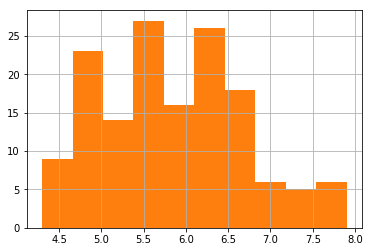

In [10]:
#Let's get a histogram of the Speal Length
iris.SepalLengthCm.hist()
plt.show()

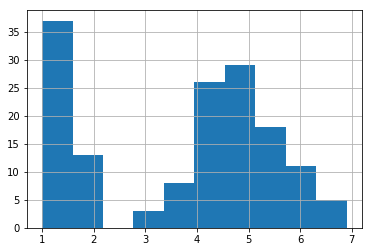

In [11]:
#Let's get the histogram of Petal Length cm
iris.PetalLengthCm.hist()
plt.show()

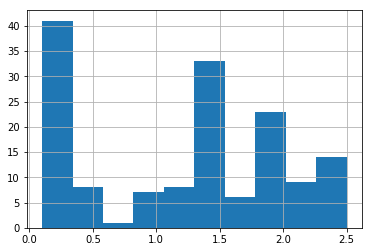

In [12]:
#Repeat with Petal Width Cm:
iris.PetalWidthCm.hist()
plt.show()

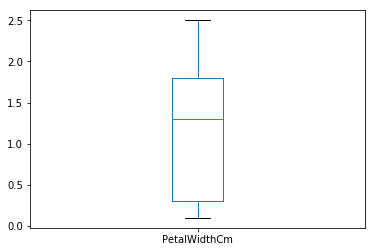

In [89]:
#Create boxplot:
iris.PetalWidthCm.plot.box()
plt.show()

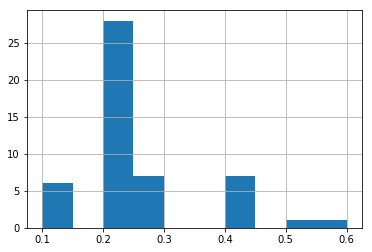

In [16]:
#Get histogram of Iris-setosa by Petal Width 
#When filtering, decide what unique value you want to examine, and what particular continuous variable you choose to display.
iris[iris.Species == 'Iris-setosa']['PetalWidthCm'].hist()
plt.show()

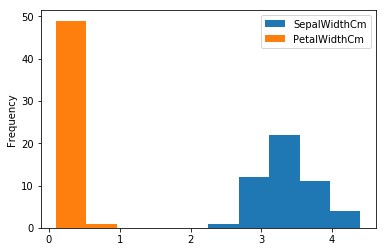

In [24]:
iris.iloc[:50, :].plot(x = 'Species', y=['SepalWidthCm', 'PetalWidthCm'], kind='hist')
plt.show()

Let's use the groupby function. This is another filtering application that allows users to group data by some category given in a column. For example, let's group the dataframe by species value and find their means:

In [26]:
#Check values of the species
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
iris.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [33]:
##Can also find the median:
iris.groupby('Species').median().iloc[:, 1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [62]:
#Use df.plot func again to plot the multiple y column values:
mean_groupby = (iris.groupby('Species').mean()).reset_index()
mean_groupby

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,25.5,5.006,3.418,1.464,0.244
1,Iris-versicolor,75.5,5.936,2.770,4.260,1.326
2,Iris-virginica,125.5,6.588,2.974,5.552,2.026


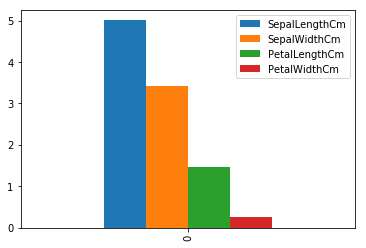

In [74]:
pd.DataFrame(mean_groupby.iloc[0, :]).T.plot.bar()
plt.show()

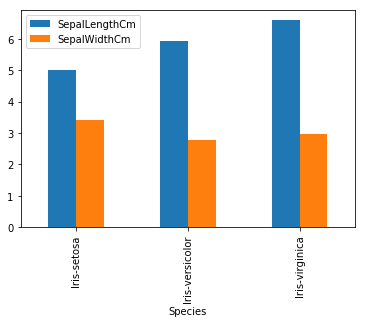

In [80]:
mean_groupby.plot(x = 'Species', y =['SepalLengthCm', 'SepalWidthCm'], kind='bar')
plt.show()

In [81]:
median_groupby = iris.groupby('Species').median()
median_groupby
#notice we can igonore the ID column

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


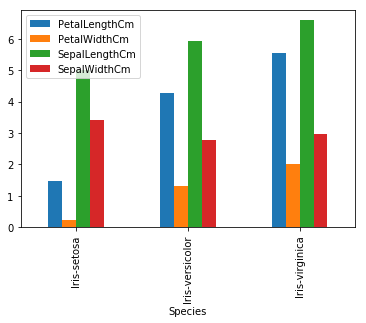

In [82]:
mean_groupby.plot(x = 'Species', y = ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'], kind='bar')
plt.show()

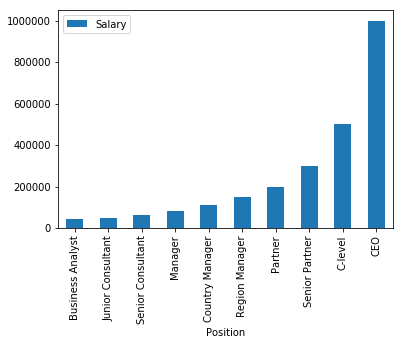

In [96]:
#Using the salaries dataset, let's make a bar chart showing salaries by position
#Again same concept for multiple columns in Y; however putting level doesn't make the graph clear since the Y axis limit is too large to show.
salaries = pd.read_csv("Position_Salaries.csv")
salaries.plot(x = 'Position', y=['Salary'], kind = 'Bar')
plt.show()

## 2. Basic graphs with single/multiple plots

### Anatomy of a figure

(Insert Image Here)

Figure: the outermost container of the graphic. One figure can hold multiple graphs. These graphs are known as Axes objects. Axes: the individual plot (Not the same as axis). Title: Sort of obvious. Axis: X and Y axis X/Y label: labels for both x & y.

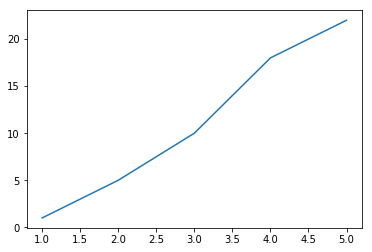

In [97]:
plt.plot([1,2,3,4,5], [1,5,10,18, 22])
plt.show()

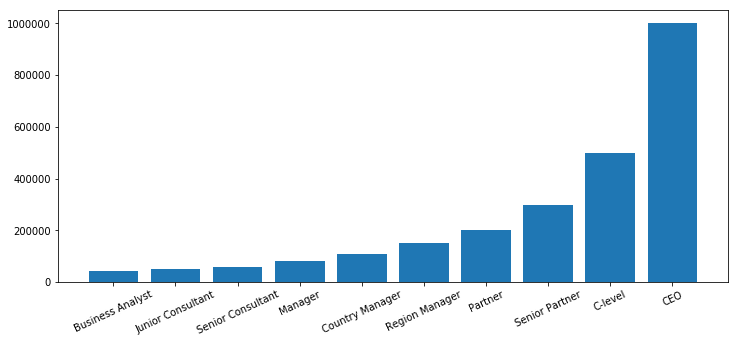

In [95]:
figure1, axes = plt.subplots(nrows=1,ncols=1, figsize = (12,5))
ax1 = plt.bar(np.arange(10), salaries.Salary)
plt.xticks(np.arange(10), salaries.Position, rotation = 25)
plt.show()

Now we'll do the same with the Seaborn package!

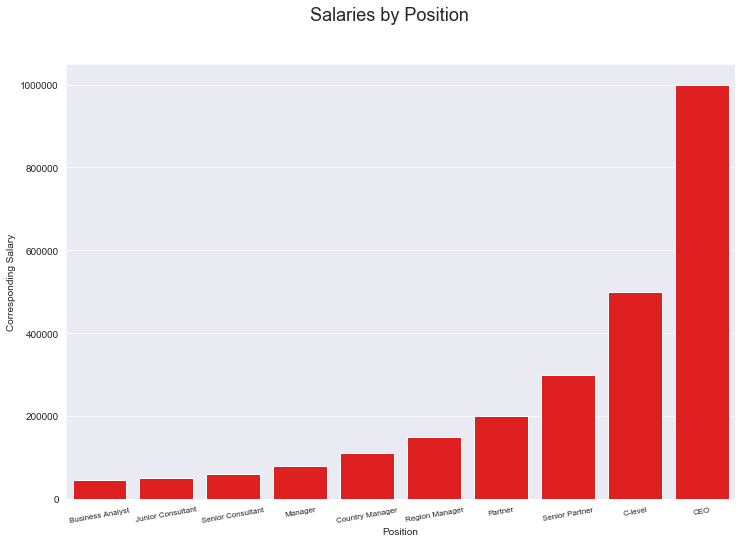

In [98]:
import seaborn as sns
sns.set_style("darkgrid")

figure1, axes = plt.subplots(nrows=1,ncols=1, figsize = (12,8))
axes = sns.barplot(x = salaries.Position, y = salaries.Salary, color = 'red')
axes.set_xticklabels(axes.get_xmajorticklabels(), fontsize=8, rotation = 10)
axes.set_ylabel("Corresponding Salary")
figure1.suptitle("Salaries by Position", fontsize = 18)
plt.show()

Thus, this seems a bit more intuitive than the previous example.  Note the changeable characteristics: size of xticks, x/y labels, figure title, color. Next, let's make a 2 subplots that each contain a scatterplot. We will be using the iris dataset for this problem. 

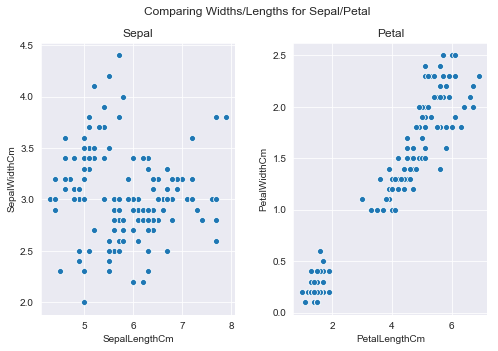

In [21]:
iris = pd.read_csv("Iris.csv")
figure2, axes = plt.subplots(nrows=1, ncols = 2, figsize = (8,5))
scatterplot1 = sns.scatterplot(iris.SepalLengthCm, iris.SepalWidthCm, ax= axes[0])
scatterplot2 = sns.scatterplot(iris.PetalLengthCm, iris.PetalWidthCm, ax = axes[1])
scatterplot1.set_title("Sepal") #Assigns an individial title for each subplot
scatterplot2.set_title("Petal")
figure2.subplots_adjust(wspace=0.3) #Adjusts the width of each subplots
figure2.suptitle("Comparing Widths/Lengths for Sepal/Petal")
plt.show()

Let's now make some boxplots. Our x-axis here will be categorical. The 'Species' column will serve as the categories. We can then compare the boxplot for each category with a given continious variable (such as sepal width/length or petal width/length). Let's make one graph that compares the petal length for each category. 

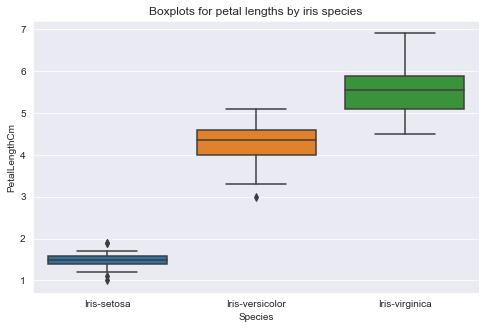

In [101]:
figure3, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplot = sns.boxplot(x = "Species", y = "PetalLengthCm", data = iris, ax= axes)
boxplot.set_title("Boxplots for petal lengths by iris species")
plt.show()

Create four plots where each subplots compare boxplots by certain measure. 

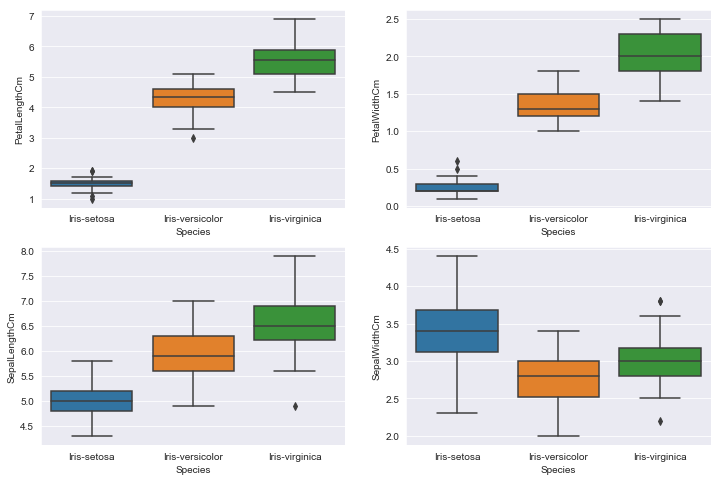

In [27]:
figure4, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
boxplot1 = sns.boxplot(x = "Species", y = "PetalLengthCm", data = iris, ax= axes[0,0])
boxplot2 = sns.boxplot(x = "Species", y = "PetalWidthCm", data = iris, ax= axes[0,1])
boxplot3 = sns.boxplot(x = "Species", y = "SepalLengthCm", data = iris, ax= axes[1,0])
boxplot4 = sns.boxplot(x = "Species", y = "SepalWidthCm", data = iris, ax= axes[1,1])
plt.show()

Notice the pattern of creating these subplots and their particular syntax when choosing a certain plot. Let's make another similar figure but with violin plots. 

C:\Users\Brian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


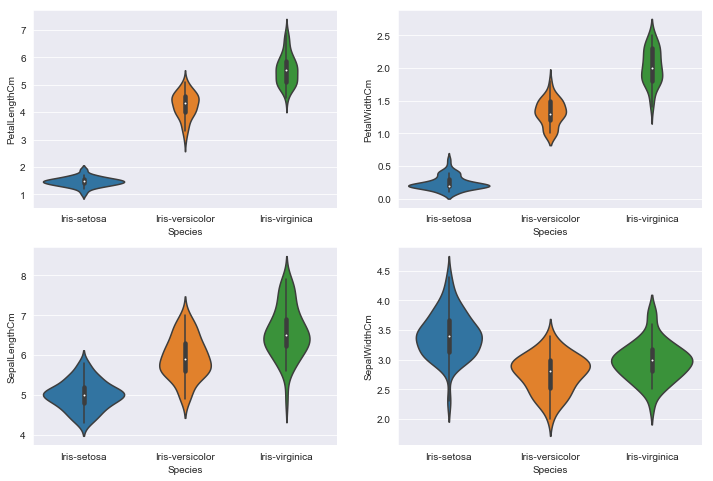

In [28]:
figure5, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
violinplot1 = sns.violinplot(x = "Species", y = "PetalLengthCm", data = iris, ax= axes[0,0])
violinplot2 = sns.violinplot(x = "Species", y = "PetalWidthCm", data = iris, ax= axes[0,1])
violinplot3 = sns.violinplot(x = "Species", y = "SepalLengthCm", data = iris, ax= axes[1,0])
violinplot4 = sns.violinplot(x = "Species", y = "SepalWidthCm", data = iris, ax= axes[1,1])
plt.show()

### Other Seaborn Plots

C:\Users\Brian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


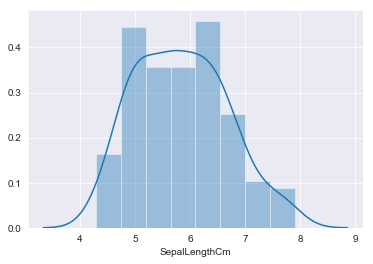

In [112]:
sns.distplot(iris['SepalLengthCm'], kde=True)
plt.show()
##notice here I didn't create a figure,ax variable. Creating those can give you more customization

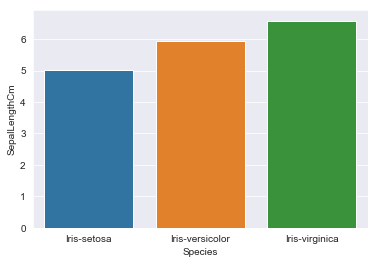

In [120]:
sns.barplot(x = 'Species', y='SepalLengthCm', data = mean_groupby)
plt.show()

#Similar to mean_groupby.plot(x = 'Species', y =['SepalLengthCm'], kind='bar')

C:\Users\Brian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


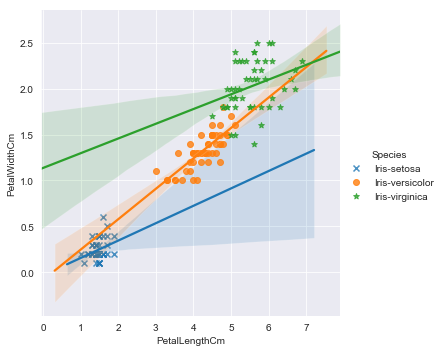

In [127]:
#Examples of some multivariate graphs:
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, hue = 'Species', markers =['x', 'o', '*'])
plt.show()

C:\Users\Brian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


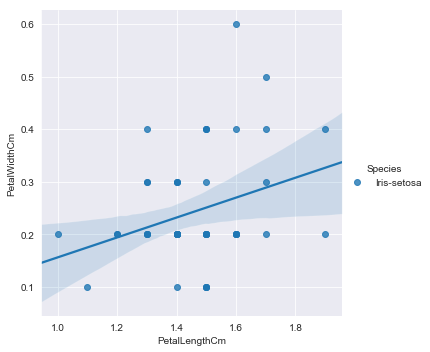

In [131]:
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris.iloc[:50, :], hue = 'Species')
plt.show()

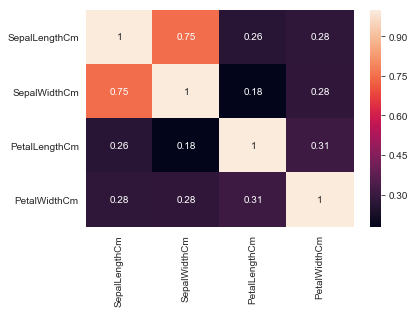

In [141]:
#Create a heatmap:
sns.heatmap(iris.iloc[:50, 1:5].corr(), annot=True)
plt.show()
